In [3]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, l, a = symbols( 't k l a' )
init_printing(use_unicode=True)

# Basis vectors for convenience:

v1 = N.i
v2 = N.j

# "Generic" choice of vector in the (dual of the) Lie algebra:

Phi = t*(v1 + 2*v2)

# Define the interior vertices:

def P12(k,l,a):
    return Vector.zero

def P23(k,l,a):
    return k*v1

def P14(k,l,a):
    return l*v2

def P34(k,l,a):
    return k*v1 + l*v2

# Exterior points coming from the cut:

def Q12_1(k,l,a):
    return -a*v2

def Q12_2(k,l,a):
    return -a*v1

def Q23_2(k,l,a):
    return (k+a)*v1

def Q23_3(k,l,a):
    return k*v1 - a*v2

def Q34_3(k,l,a):
    return k*v1 + (k+a)*v2

def Q34_4(k,l,a):
    return (k+a)*v1 + k*v2

def Q14_1(k,l,a):
    return (l+a)*N.j

def Q14_4(k,l,a):
    return -a*N.i + l*N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:
# Delta12 is the bottom-left simplex:

def Delta12(k,l,a):
    return f( P12(k,l,a), v1, v2 ) * ( f( Vector.zero, -v1, -v2 ) + f( -a*v1, v1, v1 - v2 ) + f( -a*v2, v2, -v1 + v2 ) )

# Delta23 is the bottom-right simplex:

def Delta23(k,l,a):
    return f( P23(k,l,a), -v1, v2 ) * ( f( Vector.zero, v1, -v2 ) + f( a*v1, -v1, -v1 - v2 ) + f( -a*v2, v1 + v2, v2 ) )

# Delta34 is the top-right simplex:

def Delta34(k,l,a):
    return f( P34(k,l,a), -v1 , -v2 ) * ( f( Vector.zero, v1, v2 ) + f( a*v1, -v1 + v2, -v1 ) + f( a*v2, v1 - v2, -v2 ) )

# Delta14 is the top-left simplex:

def Delta14(k,l,a):
    return f( P14(k,l,a), v1 , -v2 ) * ( f( Vector.zero, v2, -v1 ) + f( -a*v1, v1, v1 + v2 ) + f( a*v2, -v1 - v2, -v2 ) )

# And their sum:

def Sum(k,l,a):
    return Delta12(k,l,a) + Delta23(k,l,a) + Delta34(k,l,a) + Delta14(k,l,a)

# Take the limit as t -> 0 to get the Euler characteristic(?):

def SumLimit(k,l,a):
    return limit(Sum(k,l,a),t,0)


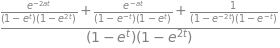

In [3]:
Delta12(k,l,a) # The bottom-left simplex

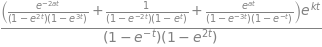

In [4]:
Delta23(k,l,a) # The bottom-right simplex

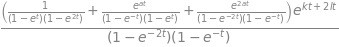

In [5]:
Delta34(k,l,a) # The top-right simplex

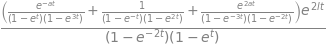

In [6]:
Delta14(k,l,a) # The top-left simplex

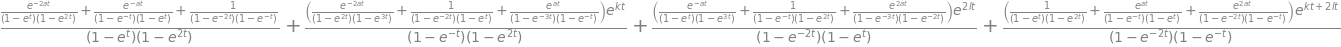

In [7]:
Sum(k,l,a) # Take their sum

In [10]:
SumLimit(k,l,a) # And let ϕ tend to zero

In [11]:
factor(SumLimit(k,l,a))

In [4]:
def Euler(k,l,a):    
    return simplify(factor( Rational(1, 6) * (a + 1) * (a + 2) * (a**2 + 2*(a*k + a*l) + 3*(a + k*l  + k + l + 1) ) ))


In [5]:
Euler(k,l,a)

In [7]:
Euler(k,l,0)

In [8]:
Euler(k,l,1)

In [9]:
Euler(k,l,2)

In [10]:
Euler(k,l,3)

In [11]:
Euler(k,0,0)

In [12]:
Euler(k,0,1)

In [13]:
Euler(k,0,2)

In [14]:
Euler(k,0,3)

In [18]:
def CoreEuler(k,l):    
    return Euler(k,l,0)

In [19]:
CoreEuler(k,l)

In [28]:
def ExtendedEuler(k,l,a):
    return factor( Euler(k,l,a) / ( Rational(1,6) * (a + 1) * (a + 2) ) )

In [29]:
ExtendedEuler(k,l,a)